In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from forecasting_functions import *

# Download data

In [2]:
# Get all data
dico = {}
data = {}
dicoFiles = {"data/DailyDelhiClimate.csv": "Climate",
             "data/Electric_Production.csv": "Electric",
             "data/monthly-beer-production-in-austr.csv": "Beer",
             "data/sales-of-shampoo.csv": "Shampoo",
             "data/time_series_60min.csv" : "ts"}

for f in dicoFiles:
    dico[dicoFiles[f]] = pd.read_csv(f)
data['Temperatures'] = dico['Climate']['meantemp'].dropna()
data['Humidity'] = dico['Climate']['humidity'].dropna()
data['Electric'] = dico['Electric']['IPG2211A2N'].dropna()
data['Beer'] = dico['Beer']['Monthly beer production'].dropna()
data['Shampoo'] = dico['Shampoo']['Sales of shampoo over a three year period'].dropna()
data['entsoe'] = dico['ts']['FR_load_actual_entsoe_transparency'].dropna()
data['solar'] = dico['ts']['FR_solar_generation_actual'].dropna()
data['onshore'] = dico['ts']['FR_wind_onshore_generation_actual'].dropna()

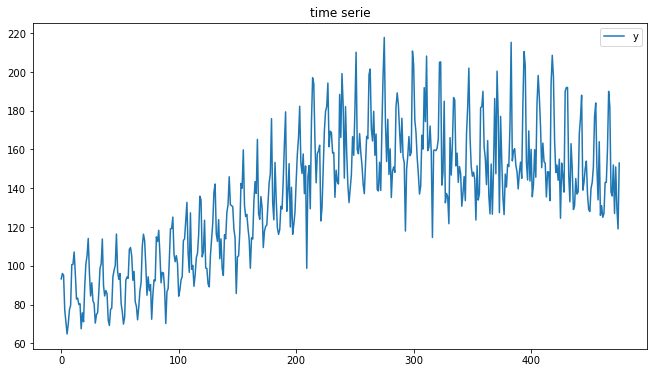

In [3]:
# Keep data to forecast
serie = pd.Series(data['Beer'])

# Conversion to pandas dataframe
df = pd.DataFrame()
df['y'] = serie

# Plot data
plt.subplots(figsize=(11, 6))
df['y'].plot()
plt.legend()
plt.title('time serie')
plt.show()

# Decompose signal and make predictions

In [4]:
# Forecasting over N steps
N = 100
df['nan'] = np.nan
forecast_df = pd.DataFrame()

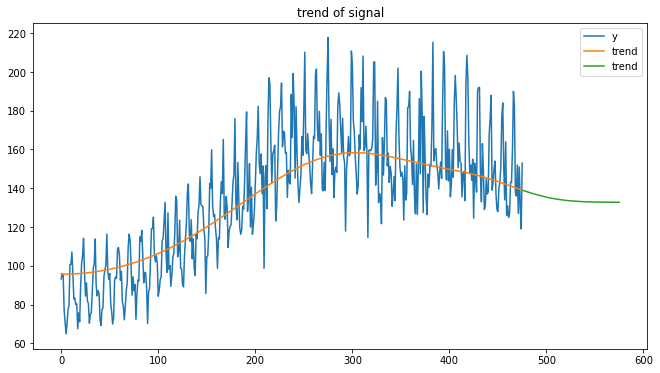

In [5]:
# Get and forecast signal trend
df['trend'], df['detrend'], pred_trend = extractTrend(df['y'],
                                                      model_trend=SVR(),
                                                      trend_degree=3,
                                                      moving_window=None,
                                                      moving_window_degree=1,
                                                      N=N)

# Plot trend
forecast_df['trend'] = list(df['nan']) + list(pred_trend)
plt.subplots(figsize=(11, 6))
df['y'].plot()
df['trend'].plot()
forecast_df['trend'].plot()
plt.legend()
plt.title('trend of signal')
plt.show()

  Period     Variance
  2 ........ 0.0
  7 ........ 0.002
  12 ....... 4.811
  24 ....... 0.026
  30 ....... 0.041
  36 ....... 0.092
  60 ....... 0.13


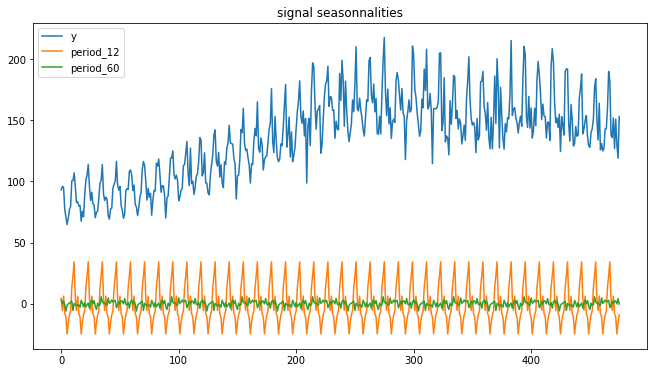

In [6]:
# Get and forecast multiple signal seasonnalities
seasonnalities, pred_seasonnalities = extractSeasonnalities(df['detrend'],
                                                            model_seasonnal=RandomForestRegressor(),
                                                            n=None,
                                                            Kbests=2,
                                                            treshold=0.1,
                                                            N=N,
                                                            verbose=True)    

# Put seasonnalities and predictions in a pandas dataframe
df['noise'] = df['y']-df['trend']
df['seasonnal'] = 0
forecast_df['seasonnal'] = list(df['nan']) + [0 for _ in range(N)]
for p in seasonnalities:
    df['period_'+p] = seasonnalities[p]
    df['noise'] -= df['period_'+p]
    df['seasonnal'] += df['period_'+p]
    forecast_df['seasonnal_'+p] = list(df['nan']) + list(pred_seasonnalities[p])
    forecast_df['seasonnal'] += list(df['nan'])+list(pred_seasonnalities[p])


# Plot seasonnalities
plt.subplots(figsize=(11, 6))
df['y'].plot()
df['trend'].plot
for p in seasonnalities:
    df['period_'+p].plot()
plt.legend()
plt.title('signal seasonnalities')
plt.show()

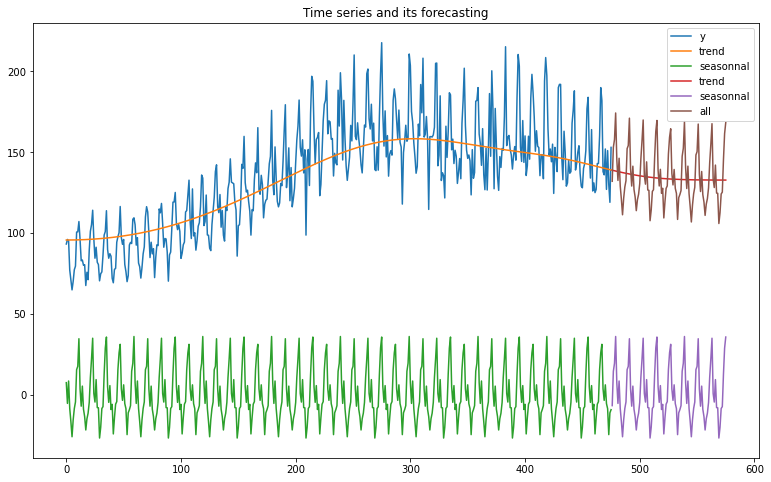

In [7]:
# Add predictions together to get final prediction 
forecast_df['all'] = forecast_df['trend'] + forecast_df['seasonnal']

# Plot predictions
plt.subplots(figsize=(13, 8))
df['y'].plot()
df['trend'].plot()
df['seasonnal'].plot()
forecast_df['trend'].plot()
forecast_df['seasonnal'].plot()
forecast_df['all'].plot()
plt.title('Time series and its forecasting')

plt.legend()
plt.show()